Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



In [3]:
# load and inspect data
aave_df = pd.read_csv(Path('../../resources/prices/coin_Aave.csv'), index_col='SNo')
aave_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...
142,Aave,AAVE,2021-02-23 23:59:59,401.648853,288.714523,400.784976,359.497520,1.179704e+09,4.461395e+09
143,Aave,AAVE,2021-02-24 23:59:59,402.910314,344.938860,360.210985,367.230900,7.635339e+08,4.557747e+09
144,Aave,AAVE,2021-02-25 23:59:59,384.707877,337.501464,367.219217,337.501464,4.506436e+08,4.189245e+09


In [4]:
aave_df['Date'] = pd.to_datetime(aave_df['Date']).dt.date
aave_df['Date'] = pd.to_datetime(aave_df['Date'])
aave_df['Spread'] = aave_df.High - aave_df.Low
aave_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 1 to 146
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       146 non-null    object        
 1   Symbol     146 non-null    object        
 2   Date       146 non-null    datetime64[ns]
 3   High       146 non-null    float64       
 4   Low        146 non-null    float64       
 5   Open       146 non-null    float64       
 6   Close      146 non-null    float64       
 7   Volume     146 non-null    float64       
 8   Marketcap  146 non-null    float64       
 9   Spread     146 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 12.5+ KB


## Plot the closing value of aave over time

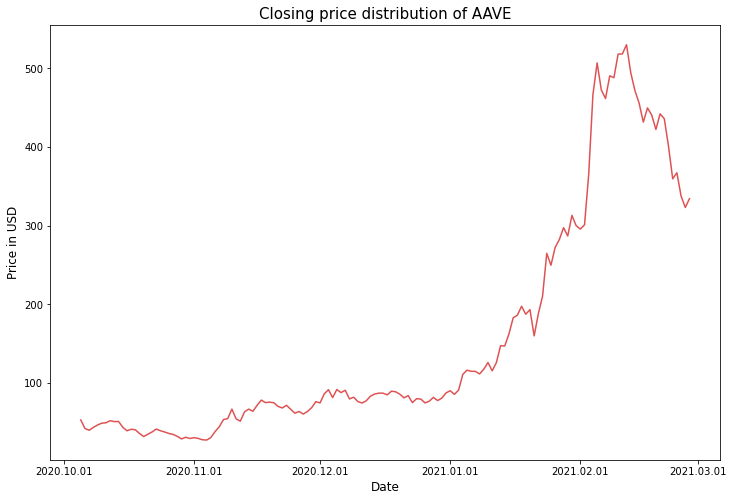

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = aave_df.Close.values, x=aave_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = aave_df.Close.values, x=aave_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of AAVE", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

aave_df['Date_mpl'] = aave_df['Date'].apply(lambda x: mdates.date2num(x))

temp_aave_df = aave_df.copy(deep=False)
temp_aave_df = temp_aave_df.set_index(['Date'])
temp_aave_df = temp_aave_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_aave_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,18540.0
2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,18541.0
2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,18542.0
2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,18543.0
2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,18544.0
...,...,...,...,...,...,...
2021-02-23,401.648853,288.714523,400.784976,359.497520,1.179704e+09,18681.0
2021-02-24,402.910314,344.938860,360.210985,367.230900,7.635339e+08,18682.0
2021-02-25,384.707877,337.501464,367.219217,337.501464,4.506436e+08,18683.0


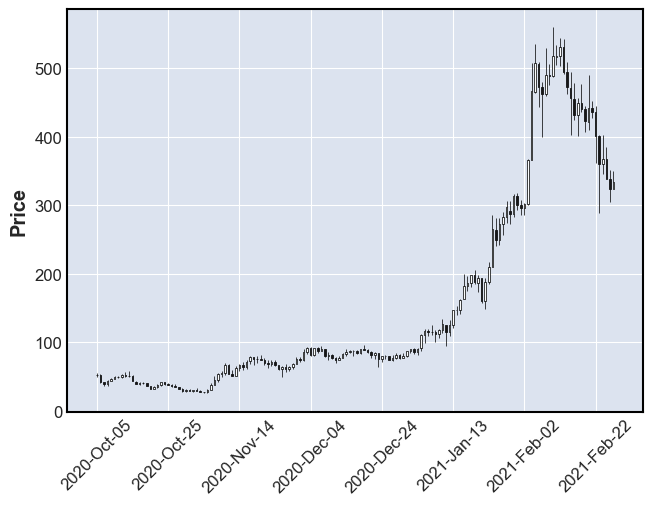

In [7]:
mpf.plot(temp_aave_df, type='candle')

In [8]:
#fig = plt.figure(figsize=(12,8))
#ax1 = plt.subplot2grid((1,1), (0,0))

#candlestick_df = aave_df[aave_df['Date']>'2017-05-01']
#ohlc = []
#for ind, row in candlestick_df.iterrows():
#    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
#    ohlc.append(ol)
    
## candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
#plt.xlabel("Date", fontsize=12)
#plt.ylabel("Price in USD", fontsize=12)
#plt.title("Candlestick chart for Aave", fontsize=15)
#plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
#plt.show()

In [9]:
#aave_df_2 = pd.read_csv('../../resources/prices/coin_Aave.csv', index_col='SNo',parse_dates=['Date'])
#aave_df_2['Date_mpl'] = aave_df_2['Date'].apply(lambda x: mdates.date2num(x))

#fig, ax = plt.subplots(figsize=(12,8))
## sns.lineplot(aave_df_2.Close.values, time=aave_df_2.Date_mpl.values, alpha=0.8, color=color[2], ax=ax)
#ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
#fig.autofmt_xdate()
#plt.xlabel('Date', fontsize=12)
#plt.ylabel('Price in USD', fontsize=12)
#plt.title("Closing price distribution of AAVE", fontsize=15)
#plt.show()

## Future Price Prediction

In [10]:
from fbprophet import Prophet

In [11]:
INPUT_FILE = "coin_Aave.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
171,2021-03-25 23:59:59,652.323034,591.115812,714.367859
172,2021-03-26 23:59:59,658.707905,597.630749,721.646004
173,2021-03-27 23:59:59,664.278769,605.763700,724.406628
174,2021-03-28 23:59:59,676.468318,610.880046,738.573805
175,2021-03-29 23:59:59,681.268194,618.099140,742.903599


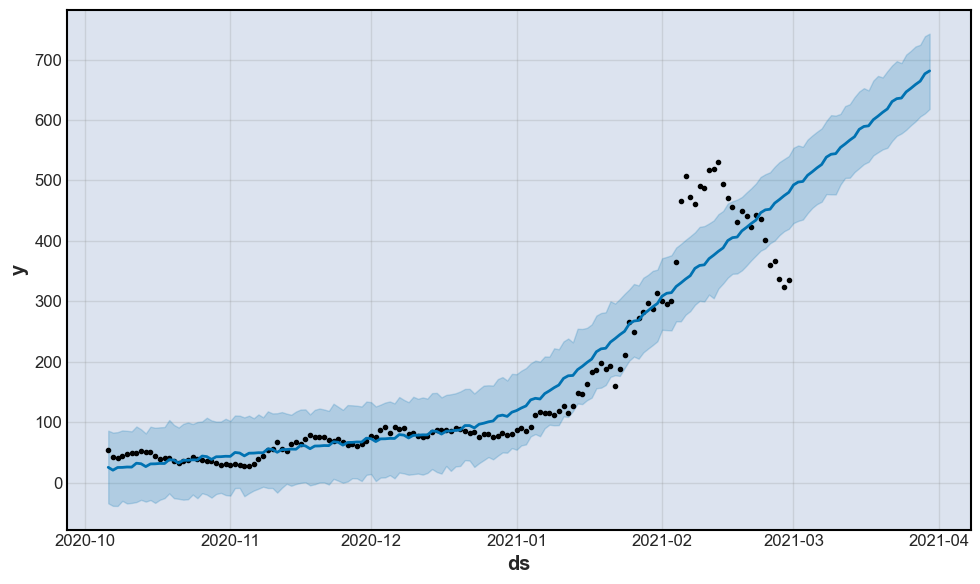

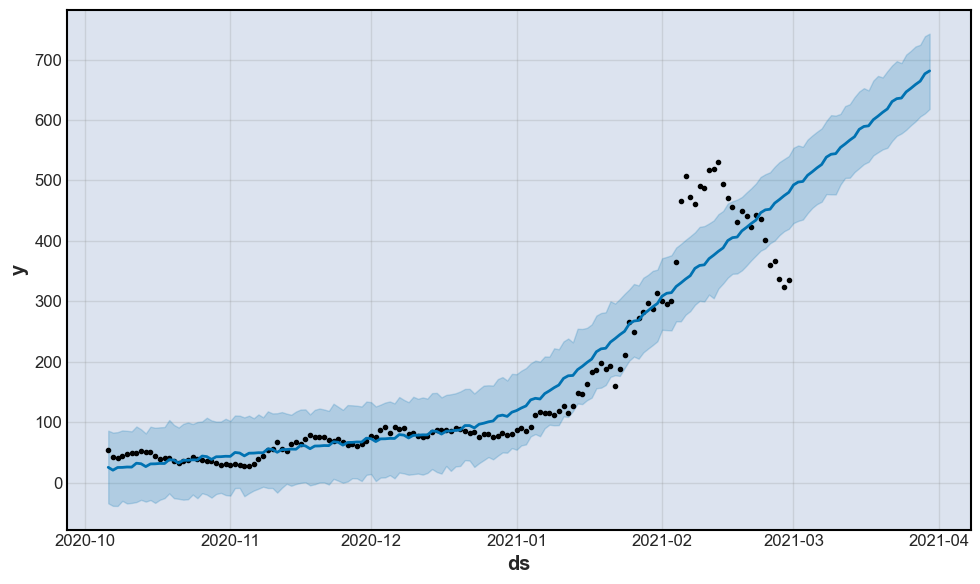

In [12]:
m.plot(forecast)

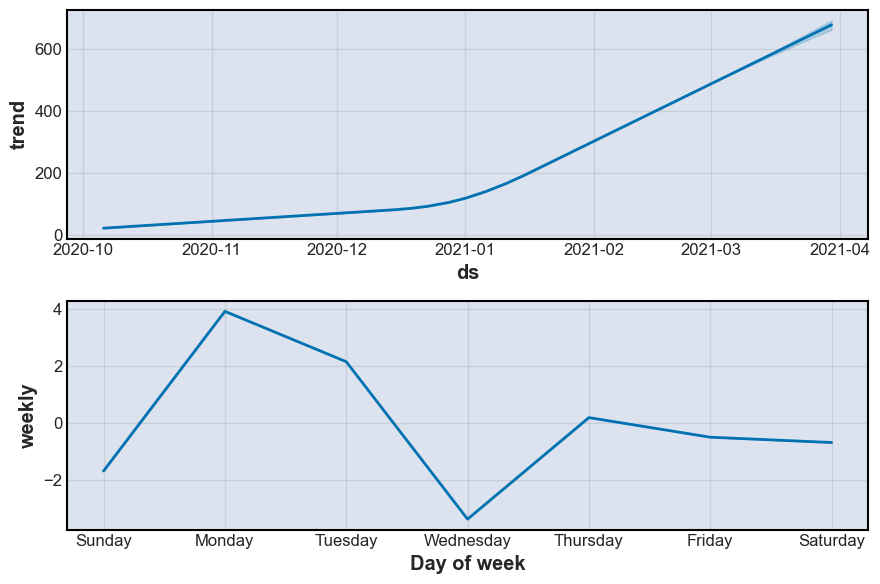

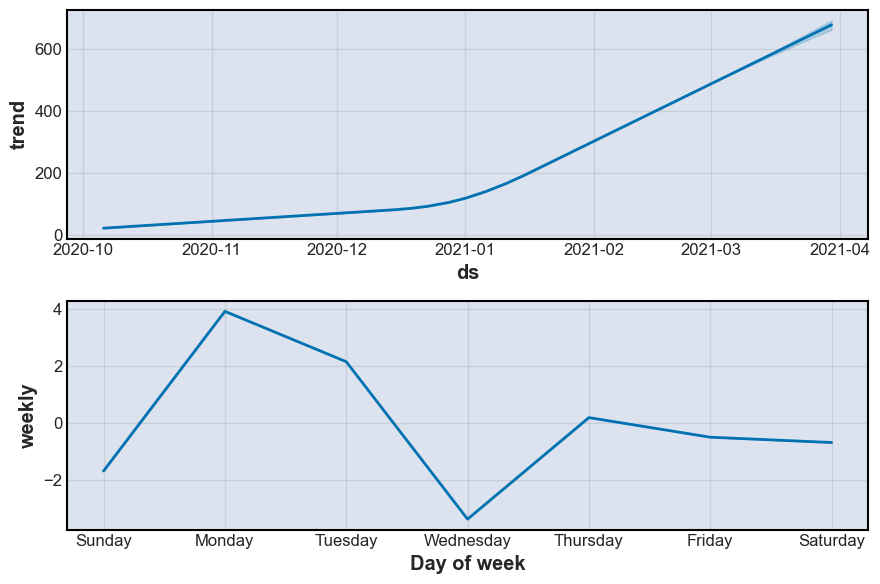

In [13]:
m.plot_components(forecast)